<h1>
Sampling from a distribution
</h1>
There is a target distribution p(x). Most of the times we don't know this target distribution. But we do know the numerator which is f(x). 

The probability density function is given by:

$p(x)=\frac{f(x)}{Normalizing\ constant}$
where, $f(x)$ is a piecewize function 

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# The numerator of the target distribution
def f(x):
    if x>=1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    else:
        return np.exp((x-1)/3) + np.exp((x-1)**3)

In [3]:
# normal PDF which is the candidate distribution. mu is the mean and sigma the standard deviation
def g(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)

Drawing the target distribution $p(x)$

In [4]:
norm_const=7.16556 # found using wolfram alpha

x_vals = np.arange(-5, 15,.1)
f_vals = [f(x) for x in x_vals]
p_vals = [f/norm_const for f in f_vals]

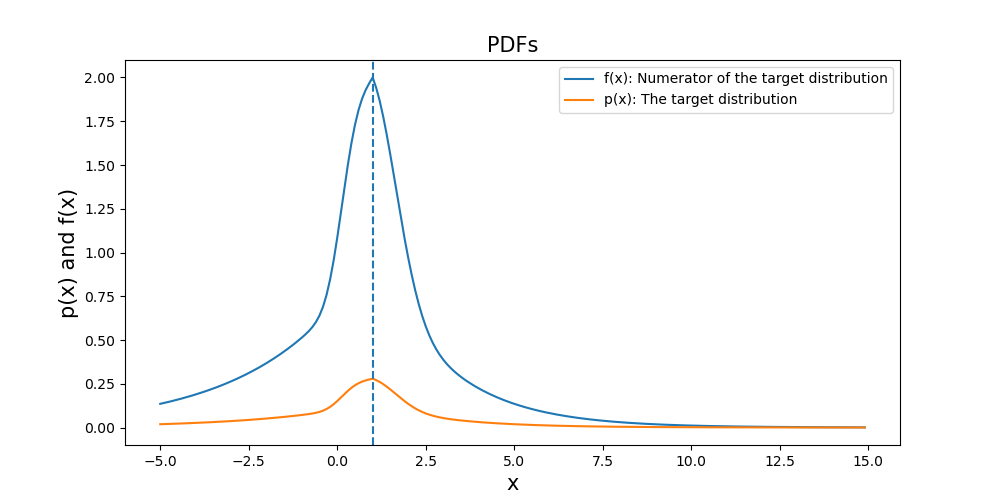

In [5]:
# Plot the two functions
plt.figure(figsize=(10,5))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.title('PDFs',fontsize=15)
plt.legend(['f(x): Numerator of the target distribution', 'p(x): The target distribution'])
plt.xlabel('x',fontsize=15)
plt.ylabel('p(x) and f(x)',fontsize=15)
plt.axvline(1, linestyle='--')

plt.show()

In [6]:
# True expected value for a random draw from p(x). We will use this as a control to see how well the other methods work
true_exp = 1.94709 / norm_const # from wolframalpha
print(true_exp)

0.2717289367474419


<h1 style="color:cyan">
Accept-Reject (Rejection) Sampling 
</h1>

Accepting ptobability is given by:
$\frac{f(s)}{M*g(s)}$

<h3 style="color:cyan">
with Normal (0,3) candidate distriution
</h3>

0 is the mean. That is where the distibution in centered at.\
3 is its standard deviation. Higher value causes the tail to widen out. 

In [7]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 0, 3) # the candidate distribution

In [8]:
print(len(x_vals))

600


$M$ the 'stretch factor' is chosen such that $M*g(x)$ lies above $f(x)$

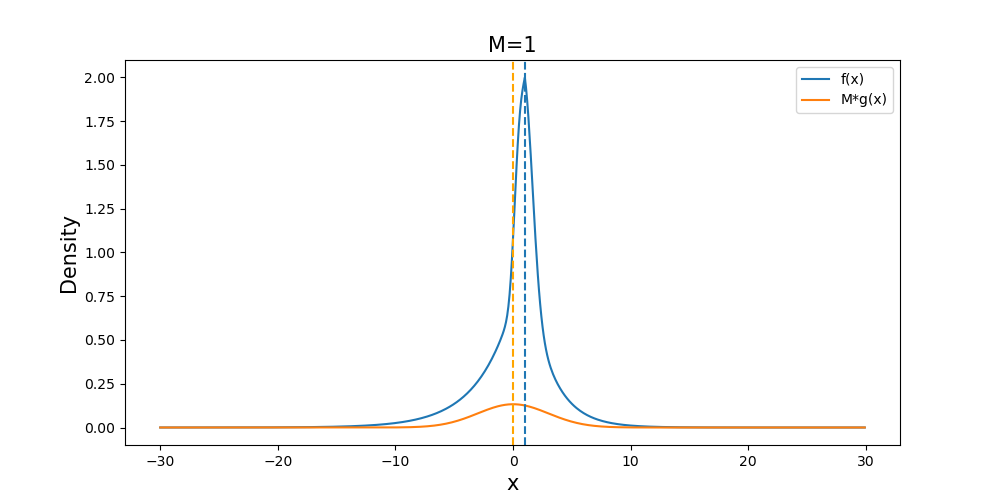

In [9]:
M=1

# Plot the two functions
plt.figure(figsize=(10,5))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.title("M=%s"%M, fontsize=15)
plt.legend(['f(x)', 'M*g(x)'])
plt.xlabel('x', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.axvline(1, linestyle='--')
plt.axvline(0, color='orange', linestyle='--')

plt.show()

$M*g(x)$ is not over $f(x)$ for $M=1$

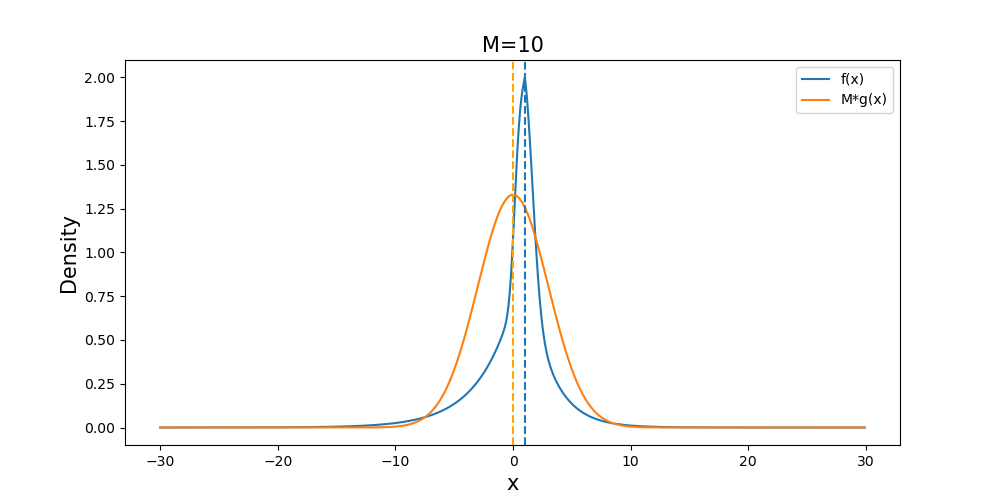

In [10]:
M=10

# Plot the two functions
plt.figure(figsize=(10,5))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.title("M=%s"%M, fontsize=15)
plt.legend(['f(x)', 'M*g(x)'])
plt.xlabel('x', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.axvline(1, linestyle='--')
plt.axvline(0, color='orange', linestyle='--')

plt.show()

$M*g(x)$ is still not over $f(x)$ for $M=10$

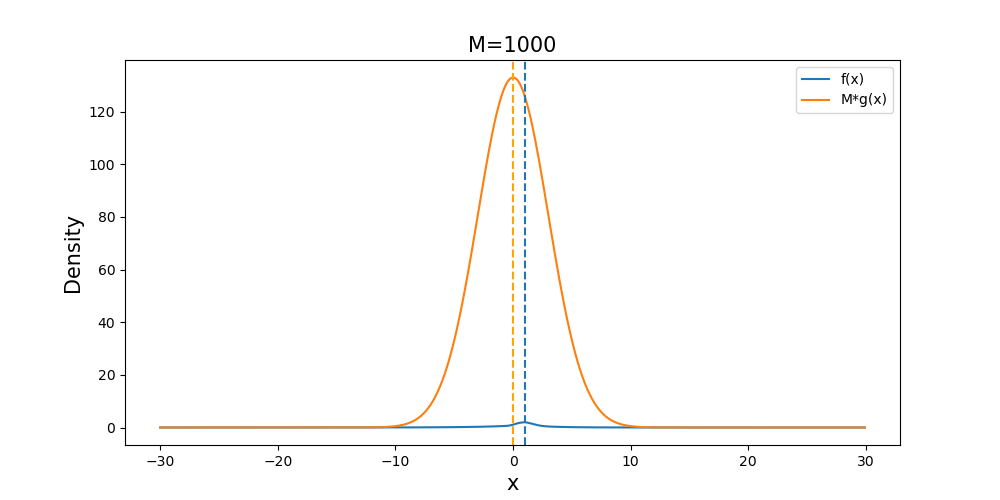

In [11]:
M=1000

# Plot the two functions
plt.figure(figsize=(10,5))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.title("M=%s"%M, fontsize=15)
plt.legend(['f(x)', 'M*g(x)'])
plt.xlabel('x', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.axvline(1, linestyle='--')
plt.axvline(0, color='orange', linestyle='--')
plt.show()

$M*g(x)$ is way over $f(x)$ for $M=1000$. We migh think this is overkill because $M*g(x)$ is way above $f(x)$ but under closer inspection we see... 

(0.0, 0.05)

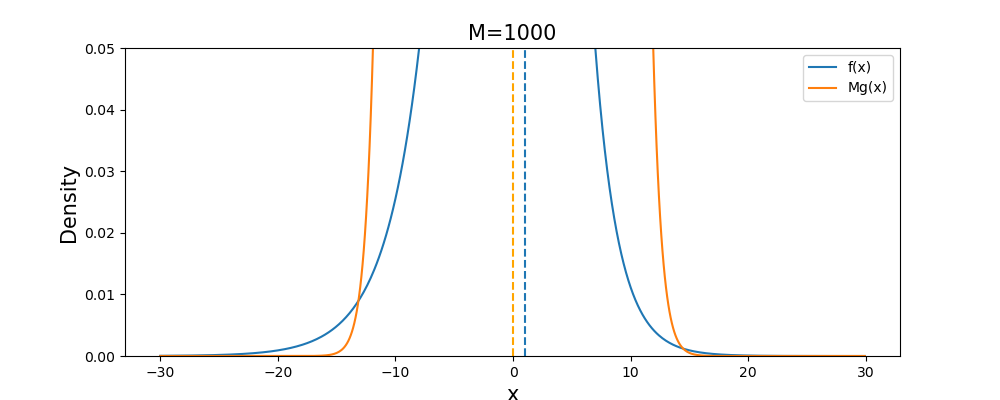

In [12]:
M = 1000

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.legend(['f(x)', 'Mg(x)'])

plt.title("M=%s"%M, fontsize=15)
plt.axvline(1, linestyle='--')
plt.axvline(0, color='orange', linestyle='--')

plt.ylim(0,.05)

...some values of $f(x)$ are still not under $M*g(x)$. Still since this region is small it is good enough to be used for sampling. So we get:

In [13]:
# collect all accepted samples here
samples=[]

# try these many candidates
N=1000000

for _ in  range (N):
    # sample a candidate
    candidate = np.random.normal(0,3) # 0 is the mean and 3 is the SD

    # calculate probability of accepting this candidate
    prob_accept = f(candidate) / (M*g(candidate, 0 ,3))

    # accept with calculated probability
    if np.random.random() < prob_accept:
        samples.append(candidate)


In [14]:
print("Number of Samples Collected: %s"%len(samples))

Number of Samples Collected: 6668


In [15]:
print("Efficiency: %s"%round(len(samples) / N, 3))

Efficiency: 0.007


We get very few samples and the accuracy of $0.7%$ is not very good. This is because $M$ is huge.

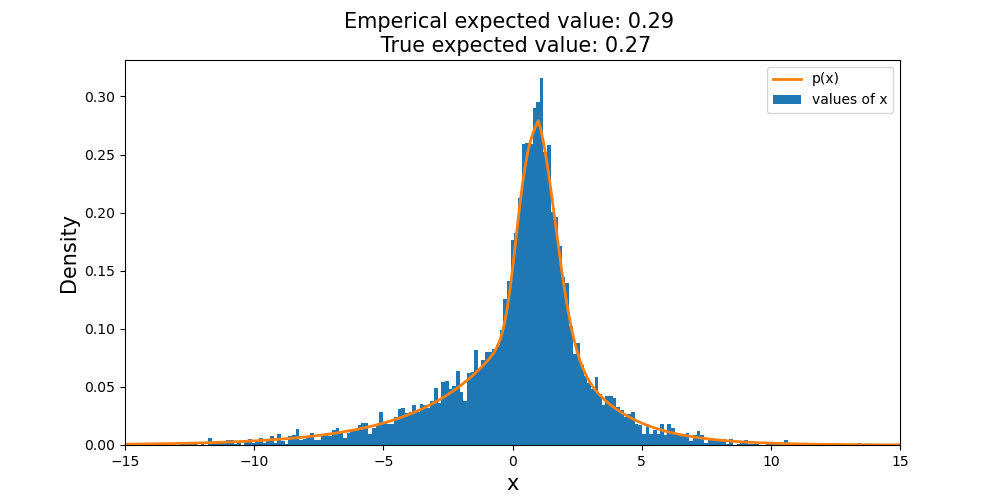

In [16]:
plt.figure(figsize=(10,5))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.plot(x_vals, [f/norm_const for f in f_vals], linewidth=2) # [p(x)] i.e. the target distribution
plt.xlim(-15,15)
plt.legend(['p(x)', 'values of x'])

plt.title('Emperical expected value: %s \n True expected value: %s' %(round(np.mean(samples), 2), round(np.mean(true_exp), 2)), fontsize=15)
plt.show()

We can see that the histogram fits the curve but not perfectly. It is pretty jagged and has a lot of error because of which our emperical expected values is not close to the true expected value.

<h3 style="color: cyan">
with N(1,4) candidate
</h3>

In the previous case N had to be scaled up (by M) so much because the candidate distribution was centered at 0, whereas the target distribution was centered at 1.

So now if we center out candidate at mean=1 we need not scale it up as much and can get a better result.\
AND\
By setting the SD to 4 the tail will flatten out which will bring it above the target distribution easier.

This way we can get more samples.

In [17]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 1, 4)

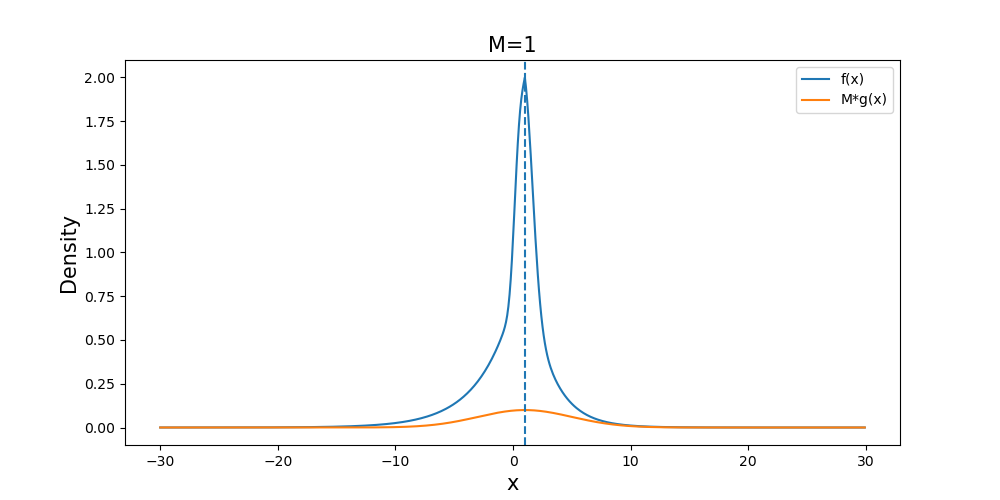

In [18]:
M=1

# Plot the two functions
plt.figure(figsize=(10,5))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.title("M=%s"%M, fontsize=15)
plt.legend(['f(x)', 'M*g(x)'])
plt.xlabel('x', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.axvline(1, linestyle='--')

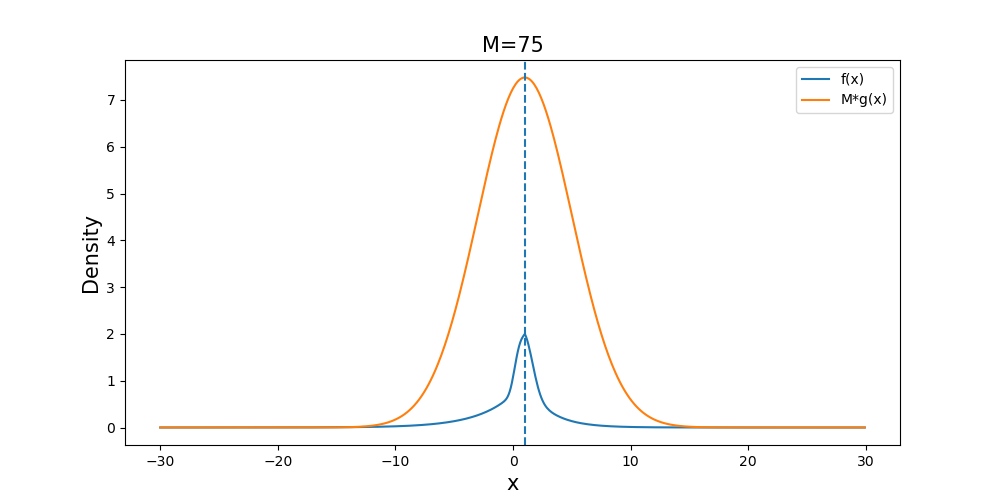

In [19]:
M=75

# Plot the two functions
plt.figure(figsize=(10,5))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.title("M=%s"%M, fontsize=15)
plt.legend(['f(x)', 'M*g(x)'])
plt.xlabel('x', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.axvline(1, linestyle='--')

(0.0, 0.05)

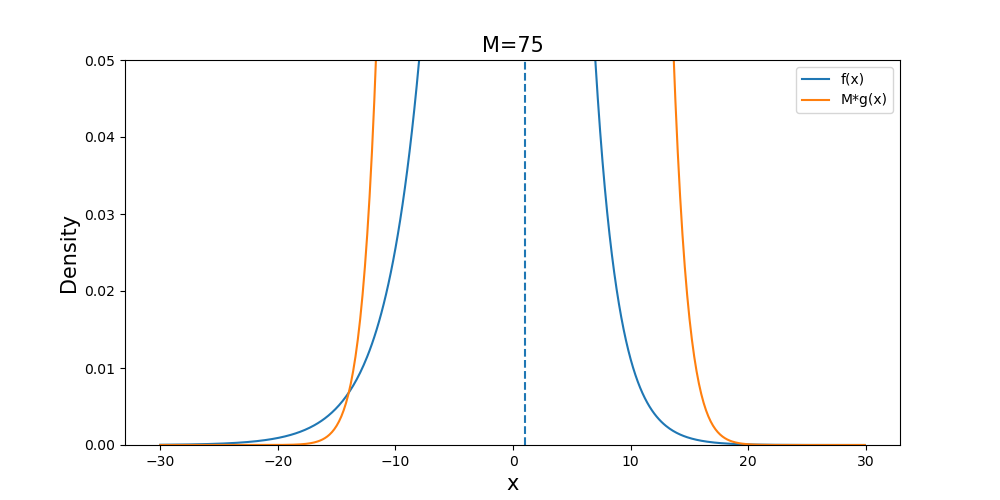

In [20]:
M=75

# Plot the two functions
plt.figure(figsize=(10,5))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.title("M=%s"%M, fontsize=15)
plt.legend(['f(x)', 'M*g(x)'])
plt.xlabel('x', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.axvline(1, linestyle='--')

plt.ylim(0,.05)

The $f(x)$ curve is still not below the $M*g(x)$ curve completely. 

In [21]:
# collect all accepted samples here
samples=[]

# try these many candidates
N=1000000

for _ in  range (N):
    # sample a candidate
    candidate = np.random.normal(0,3) # 0 is the mean and 3 is the SD

    # calculate probability of accepting this candidate
    prob_accept = f(candidate) / (M*g(candidate, 0 ,3))

    # accept with calculated probability
    if np.random.random() < prob_accept:
        samples.append(candidate)

In [22]:
print("Number of Samples Collected: %s"%len(samples))

Number of Samples Collected: 90248


In [23]:
print("Efficiency: %s"%round(len(samples) / N, 3))

Efficiency: 0.09


We get more samples than before and the efficiency now is 9%. Much better than the previous 0.7% 

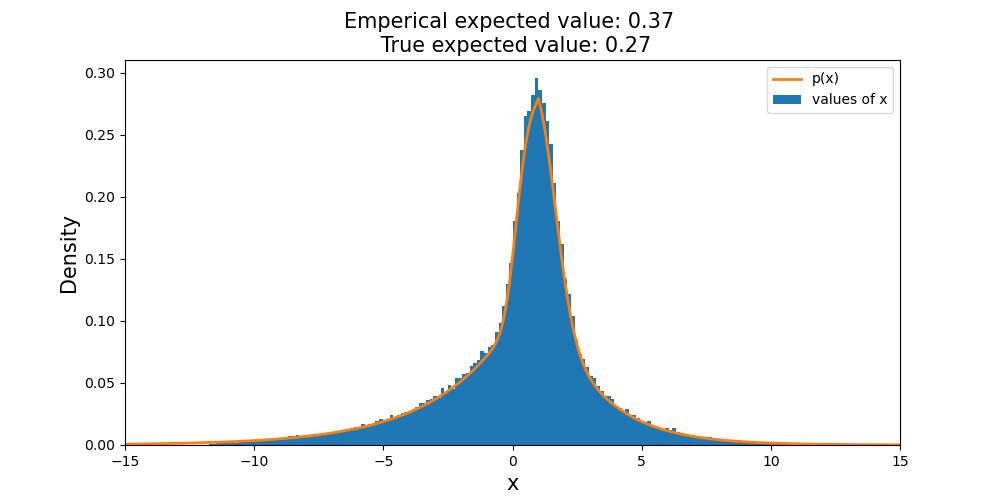

In [24]:
plt.figure(figsize=(10,5))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.plot(x_vals, [f/norm_const for f in f_vals], linewidth=2) # [p(x)] i.e. the target distribution
plt.xlim(-15,15)
plt.legend(['p(x)', 'values of x'])

plt.title('Emperical expected value: %s \n True expected value: %s' %(round(np.mean(samples), 2), round(np.mean(true_exp), 2)), fontsize=15)
plt.show()

The emperical expected value is still the same...

<h3 style="color:cyan">
Correlation between drawn samples
</h3>

There is no correlation between the samples drawn. So the current draw did not depend on the last draw.

Text(0.5, 1.0, 'Correlation: -0.0')

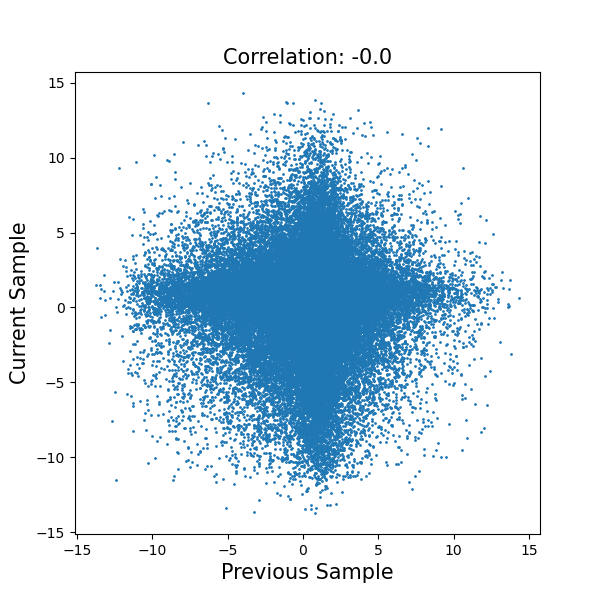

In [25]:
plt.figure(figsize=(6,6))
plt.scatter(samples[:-1], samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=15)
plt.ylabel('Current Sample', fontsize=15)

corr=round(pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=15)

There is no correlation between the samples drawn!

<h1 style="color: Yellow"> 
Metropolis Algorithm  
</h1>



<h3 style="color:yellow">
with N(x<sub>prev</sub>, 4) candidate
</h3>

x<sub>prev</sub> means the centre of the Normal distribution is centred at the last sample with SD of 4



In [26]:
# collect all accepted samples here
samples=[1]
num_accepted=0

# try these many candidates
N=1000000

for _ in  range (N):
    # sample a candidate from the normal distribution
    candidate = np.random.normal(samples[-1], 4) # samples[-1] is the mean, which is the previous sample and 
                                                 # where our normal distribution is centered. 4 is the SD.

    # calculate probability of accepting this candidate
    prob = min(1, f(candidate) / f(samples[-1])) # from the theory of Metropolis Hasting

    # accept with calculated probability
    if np.random.random() < prob:
        samples.append(candidate)
        num_accepted += 1

    # otherwise repeat current sample again by carrying it forward
    else:
        samples.append(samples[-1])

In [27]:
burn_in = 1000
retained_samples = samples[burn_in+1:] # starts from 1001

In [28]:
print("Num Samples Collected: %s"%len(retained_samples))

Num Samples Collected: 999000


In [29]:
print("Efficiency: %s"%round(len(retained_samples) / N, 3))

Efficiency: 0.999


In [30]:
print("Fraction Acceptances: %s"%np.round((num_accepted / N),2))

Fraction Acceptances: 0.48


We get a lot more samples and the efficiency is 99.9%. The best so far. The acceptance rate is aslo around 50% which means 50% of the time we accept the last candidate and 50% of the time we roll over the last candidate.

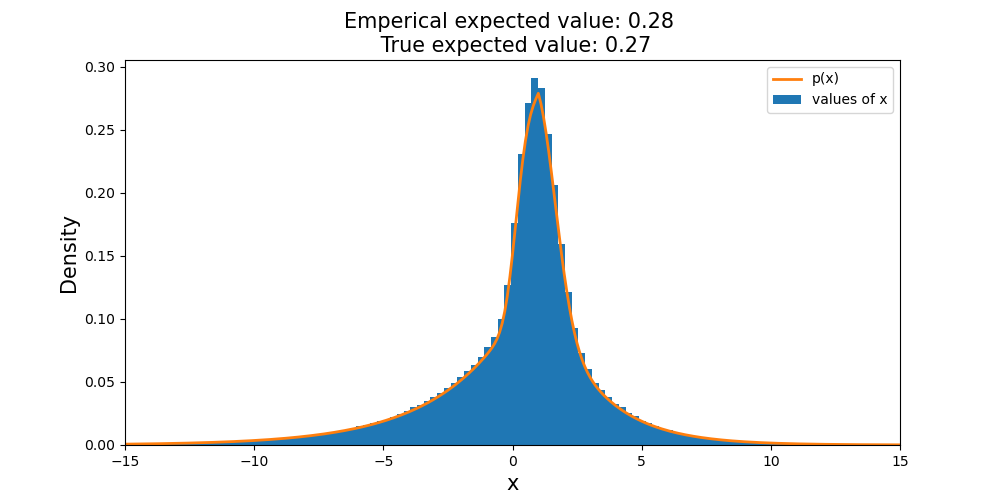

In [31]:
plt.figure(figsize=(10,5))
plt.hist(retained_samples, bins=200, density=True)
plt.xlabel('x', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.plot(x_vals, [f/norm_const for f in f_vals], linewidth=2) # [p(x)] i.e. the target distribution
plt.xlim(-15,15)
plt.legend(['p(x)', 'values of x'])

plt.title('Emperical expected value: %s \n True expected value: %s' %(round(np.mean(samples), 2), round(np.mean(true_exp), 2)), fontsize=15)
plt.show()

The emperical expected value is really close to the true expected value.

Text(0.5, 1.0, 'Correlation: 0.8')

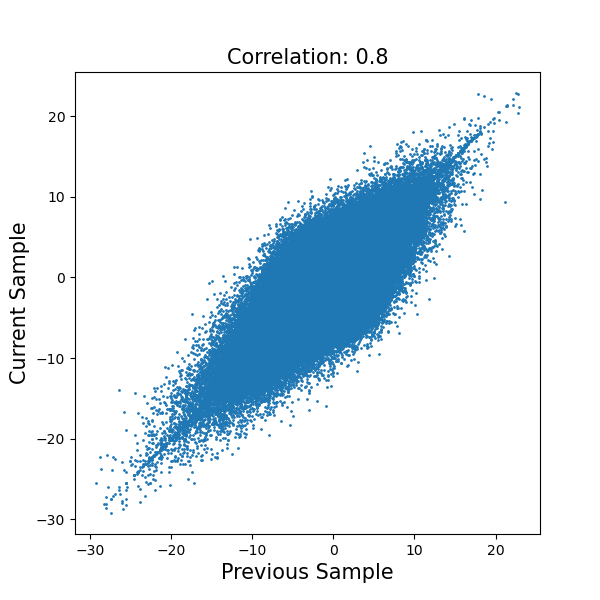

In [32]:
plt.figure(figsize=(6,6))
plt.scatter(retained_samples[:-1], retained_samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=15)
plt.ylabel('Current Sample', fontsize=15)

corr=round(pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=15)

The correlation value is much higher now suggesting a relationship between the current and previous samples.